In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: 
<Brk>
H0:Lady can't tell which was added first
<Brk>
Ha: Lady can tell which was added first

In [2]:
#Step 2: Using hypergeometric
M,n,N=8,4,4
stats.hypergeom.rvs(M,n,N,size=10000).mean()

2.02

In [3]:
#Step 3:
1-stats.hypergeom(M,n,N).pmf(np.arange(0,3)).sum()

0.24285714285714288

In [4]:
1-stats.hypergeom.cdf(2,M,n,N)

0.24285714285714288

Step 4: ...

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [5]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


#### Step 1:
<brk>
H0: The virginica species has the same mean sepal width than that of the versicolor
<Brk>
Ha: The Viginica species has a larger mean sepal width than that of the versicolor

#### Step 2: 
<brk>
Average difference between the two specis

Step 3: ...

In [6]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [10]:
num_obs=iris_sub.num_rows
ts=[]
for _ in np.arange(10000):
    iris_sample=iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts=np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])

C:\Users\C19Milo.Browder\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


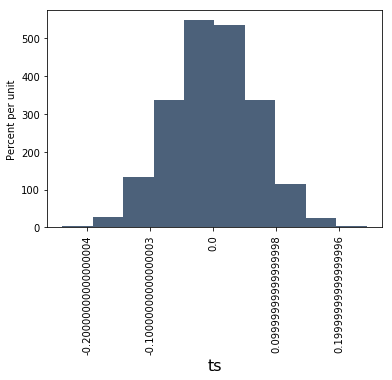

In [12]:
Table().with_column("ts",ts).hist()

In [17]:
(ts>=obs).sum()/10000

0.0011

Reject Null